In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
df = pd.read_csv("data\Punjab.csv", encoding='ISO-8859-1',low_memory=False)

df

CORPORATE_IDENTIFICATION_NUMBER  \
0               L00000PB1985PLC006112   
1               L00000PB1986PLC006798   
2               L00000PB1987PLC007582   
3               L00000PB1992PLC012590   
4               L01134PB1988PLC008755   
...                               ...   
34915           U99999PB2005PTC029069   
34916           U99999PB2006PTC029895   
34917           U99999PB2006PTC030407   
34918           U99999PB2006PTC030409   
34919           U99999PB2006PTC038200   

                                         Company_Name     Company_status  \
0                            SEEMA INDUSTRIES LIMITED  Under liquidation   
1                         ARIHANT CORPORATION LIMITED             Active   
2                              SFL INDUSTRIES LIMITED  Under liquidation   
3                                EMKAY INDUSTRIES LTD             Active   
4                               NIJJER AGRO FOODS LTD             Active   
...                                               ...                ...   
34915          SANDEEP INFRASTRUCTURE PRIVATE LIMITED             Active   
34916        ACE ROAD ASSIST SERVICES PRIVATE LIMITED         Strike Off   
34917        OCTOPUS HANDICARFTS IMPEX PRIVATELIMITED         Strike Off   
34918    INGENIOUS CORPORATE SOLUTIONS PRIVATELIMITED             Active   
34919  ECO PARYAVARAN ENGINEERS ANDCONSULTANTSPVT LTD             Active   

      Company_class           Company_Category Company_sub_category  \
0            Public  Company limited by Shares     Non-govt company   
1            Public  Company limited by Shares     Non-govt company   
2            Public  Company limited by Shares     Non-govt company   
3            Public  Company limited by Shares     Non-govt company   
4            Public  Company limited by Shares     Non-govt company   
...             ...                        ...                  ...   
34915       Private  Company limited by Shares     Non-govt company   
34916       Private  Company limited by Shares     Non-govt company   
34917       Private  Company limited by Shares     Non-govt company   
34918       Private  Company limited by Shares     Non-govt company   
34919       Private  Company limited by Shares     Non-govt company   

      DATE_OF_REGISTRATION REGISTERED_STATE  AUTHORIZED_CAP  PAIDUP_CAPITAL  \
0                 21-01-85           Punjab      50000000.0      43099070.0   
1                 09-04-86           Punjab      50000000.0      39586000.0   
2                 01-07-87           Punjab     200000000.0      54410970.0   
3                 14-09-92           Punjab      55000000.0      50221000.0   
4                 14-10-88           Punjab     150000000.0     102008000.0   
...                    ...              ...             ...             ...   
34915             11-10-05           Punjab        500000.0        100000.0   
34916             17-03-06           Punjab        200000.0        200000.0   
34917             26-06-06           Punjab        150000.0        150000.0   
34918             26-06-06           Punjab        100000.0        100000.0   
34919             30-05-06           Punjab       1000000.0        810000.0   

      Industrial_Class             PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN  \
0                    0                                       Unclassified   
1                    0                                       Unclassified   
2                    0                                       Unclassified   
3                    0                                       Unclassified   
4                 1134  Agriculture, hunting and related service activ...   
...                ...                                                ...   
34915            99999          Extraterritorial organizations and bodies   
34916            99999          Extraterritorial organizations and bodies   
34917            99999          Extraterritorial organizations and bodies   
34918            99999      

In [9]:

# Filter out rows with unknown or invalid values in 'DATE_OF_REGISTRATION'
df = df[pd.to_datetime(df['DATE_OF_REGISTRATION'], errors='coerce', dayfirst=True).notna()]

# Convert 'DATE_OF_REGISTRATION' to datetime format
df['DATE_OF_REGISTRATION'] = pd.to_datetime(df['DATE_OF_REGISTRATION'], errors='coerce', dayfirst=True)

# Extract year from the registration date
df['Registration_Year'] = df['DATE_OF_REGISTRATION'].dt.year

In [10]:
# Check for missing values
df.isnull().sum()

CORPORATE_IDENTIFICATION_NUMBER               0
Company_Name                                  0
Company_status                                0
Company_class                                11
Company_Category                             11
Company_sub_category                         11
DATE_OF_REGISTRATION                          0
REGISTERED_STATE                              0
AUTHORIZED_CAP                                0
PAIDUP_CAPITAL                                0
Industrial_Class                              0
PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN        0
Registered_Office_Address                     0
REGISTRAR_OF_COMPANIES                        0
EMAIL_ADDR                                 9403
Latest_Year_AR                            16482
Latest_Year_BS                            16493
Registration_Year                             0
dtype: int64

In [11]:
df=df.drop(['DATE_OF_REGISTRATION','EMAIL_ADDR'],axis=1)
df

CORPORATE_IDENTIFICATION_NUMBER  \
0               L00000PB1985PLC006112   
1               L00000PB1986PLC006798   
2               L00000PB1987PLC007582   
3               L00000PB1992PLC012590   
4               L01134PB1988PLC008755   
...                               ...   
34915           U99999PB2005PTC029069   
34916           U99999PB2006PTC029895   
34917           U99999PB2006PTC030407   
34918           U99999PB2006PTC030409   
34919           U99999PB2006PTC038200   

                                         Company_Name     Company_status  \
0                            SEEMA INDUSTRIES LIMITED  Under liquidation   
1                         ARIHANT CORPORATION LIMITED             Active   
2                              SFL INDUSTRIES LIMITED  Under liquidation   
3                                EMKAY INDUSTRIES LTD             Active   
4                               NIJJER AGRO FOODS LTD             Active   
...                                               ...                ...   
34915          SANDEEP INFRASTRUCTURE PRIVATE LIMITED             Active   
34916        ACE ROAD ASSIST SERVICES PRIVATE LIMITED         Strike Off   
34917        OCTOPUS HANDICARFTS IMPEX PRIVATELIMITED         Strike Off   
34918    INGENIOUS CORPORATE SOLUTIONS PRIVATELIMITED             Active   
34919  ECO PARYAVARAN ENGINEERS ANDCONSULTANTSPVT LTD             Active   

      Company_class           Company_Category Company_sub_category  \
0            Public  Company limited by Shares     Non-govt company   
1            Public  Company limited by Shares     Non-govt company   
2            Public  Company limited by Shares     Non-govt company   
3            Public  Company limited by Shares     Non-govt company   
4            Public  Company limited by Shares     Non-govt company   
...             ...                        ...                  ...   
34915       Private  Company limited by Shares     Non-govt company   
34916       Private  Company limited by Shares     Non-govt company   
34917       Private  Company limited by Shares     Non-govt company   
34918       Private  Company limited by Shares     Non-govt company   
34919       Private  Company limited by Shares     Non-govt company   

      REGISTERED_STATE  AUTHORIZED_CAP  PAIDUP_CAPITAL Industrial_Class  \
0               Punjab      50000000.0      43099070.0                0   
1               Punjab      50000000.0      39586000.0                0   
2               Punjab     200000000.0      54410970.0                0   
3               Punjab      55000000.0      50221000.0                0   
4               Punjab     150000000.0     102008000.0             1134   
...                ...             ...             ...              ...   
34915           Punjab        500000.0        100000.0            99999   
34916           Punjab        200000.0        200000.0            99999   
34917           Punjab        150000.0        150000.0            99999   
34918           Punjab        100000.0        100000.0            99999   
34919           Punjab       1000000.0        810000.0            99999   

                  PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN  \
0                                           Unclassified   
1                                           Unclassified   
2                                           Unclassified   
3                                           Unclassified   
4      Agriculture, hunting and related service activ...   
...                                                  ...   
34915          Extraterritorial organizations and bodies   
34916          Extraterritorial organizations and bodies   
34917          Extraterritorial organizations and bodies   
34918          Extraterritorial organizations and bodies   
34919          Extraterritorial organizations and bodies   

                               Registered_Office_Address  \
0      Mansa Road, BATHINDA PUNJAB , Unclassified PB ...   
1    

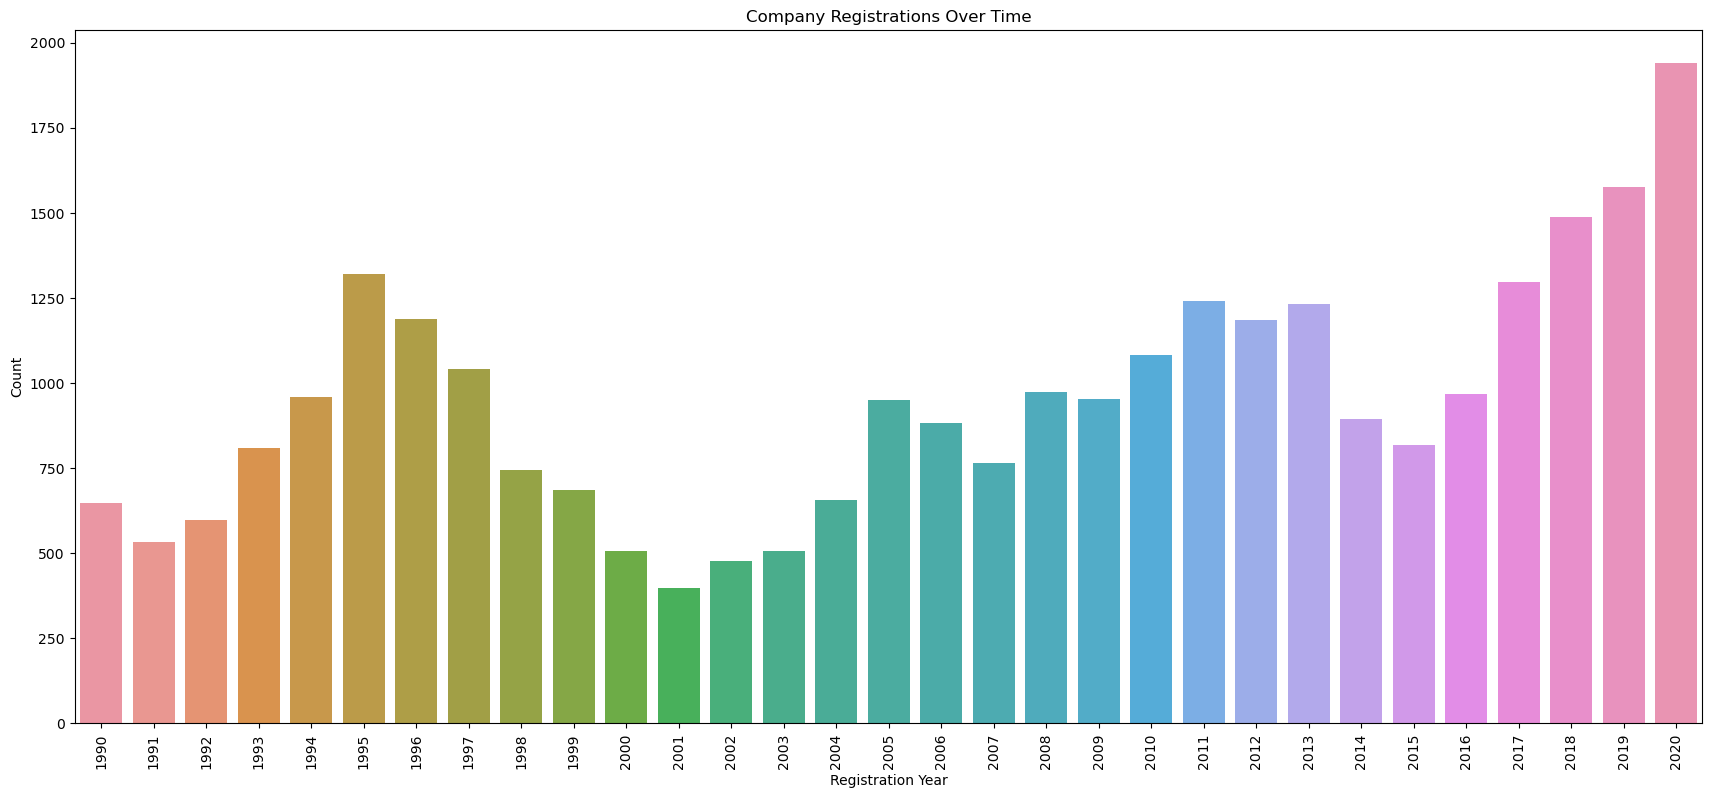

In [12]:
# EDA - Trends over time
plt.figure(figsize=(21, 9))
sns.countplot(x='Registration_Year', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)])
plt.title('Company Registrations Over Time')
plt.xlabel('Registration Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

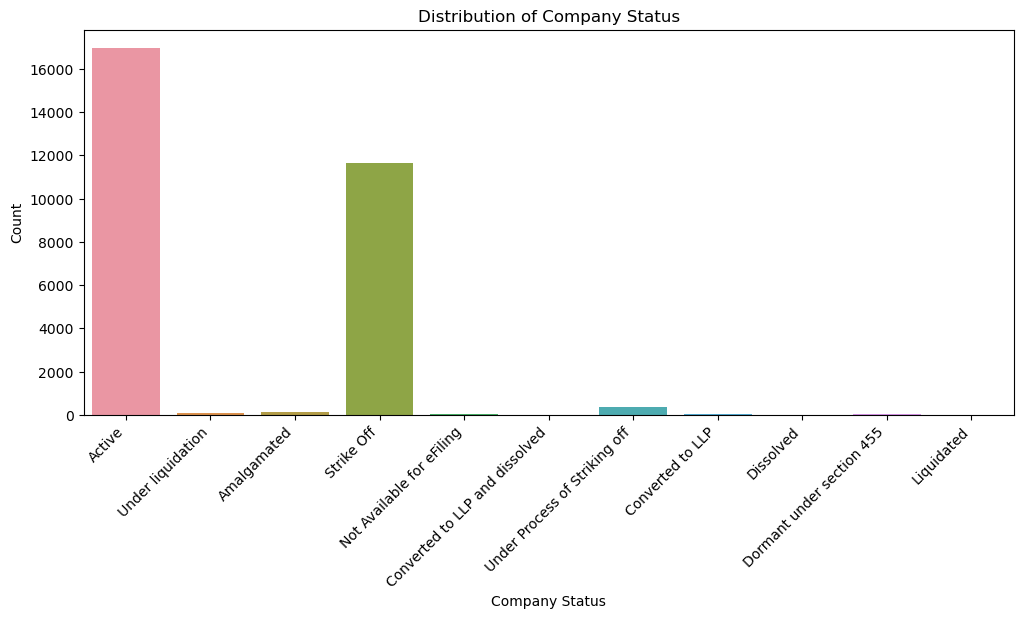

In [13]:
# EDA - Company Status
plt.figure(figsize=(12, 5))
sns.countplot(x='Company_status', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)])
plt.title('Distribution of Company Status')
plt.xlabel('Company Status')
plt.ylabel('Count')
plt.xticks(rotation=45,ha='right')
plt.show()

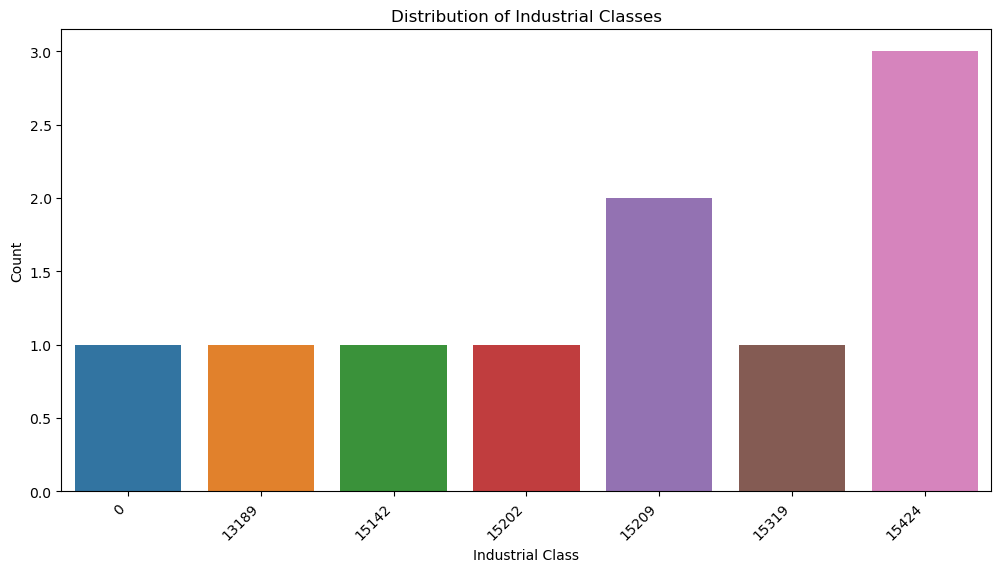

In [14]:
# EDA - Industrial Class Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Industrial_Class', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)].head(10))
plt.title('Distribution of Industrial Classes')
plt.xlabel('Industrial Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

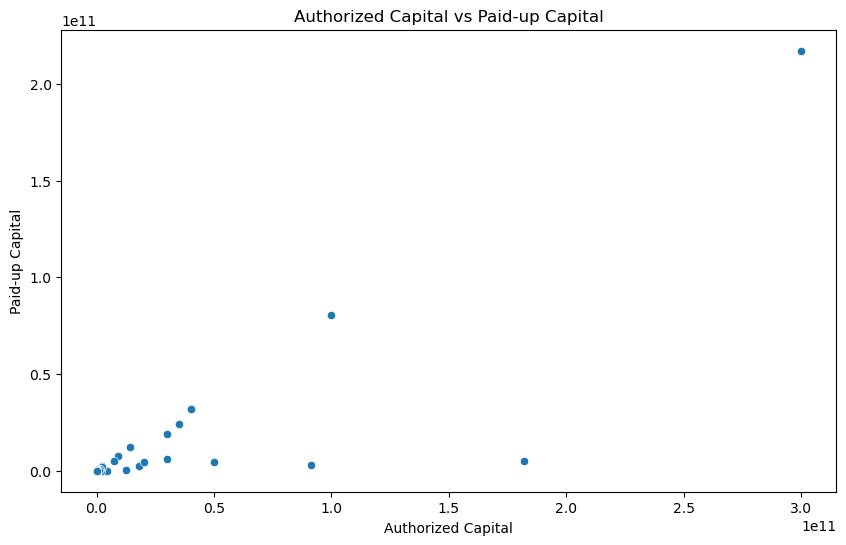

In [15]:
# EDA - Relationship between Authorized Capital and Paid-up Capital
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AUTHORIZED_CAP', y='PAIDUP_CAPITAL', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)])
plt.title('Authorized Capital vs Paid-up Capital')
plt.xlabel('Authorized Capital')
plt.ylabel('Paid-up Capital')
plt.show()

In [16]:
# Print the unique values in the 'Company_Category' column
print(df['Company_Category'].unique())

['Company limited by Shares' 'Company Limited by Guarantee' nan
 'Unlimited Company']


In [21]:
df['Company_Category'] =df['Company_Category'].replace(' ',np.nan)

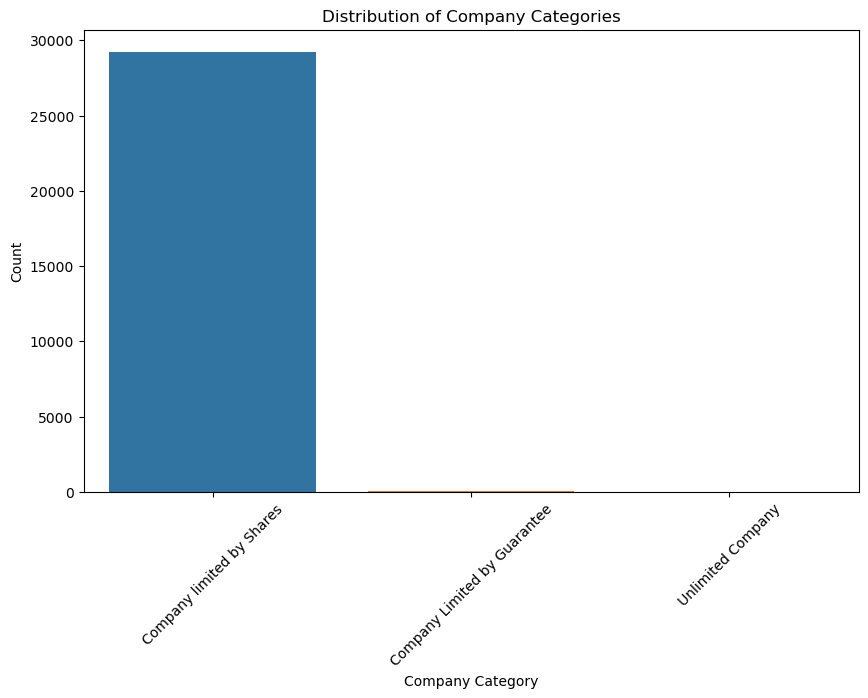

In [22]:
# EDA - Distribution of Company Categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Company_Category', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)])
plt.title('Distribution of Company Categories')
plt.xlabel('Company Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

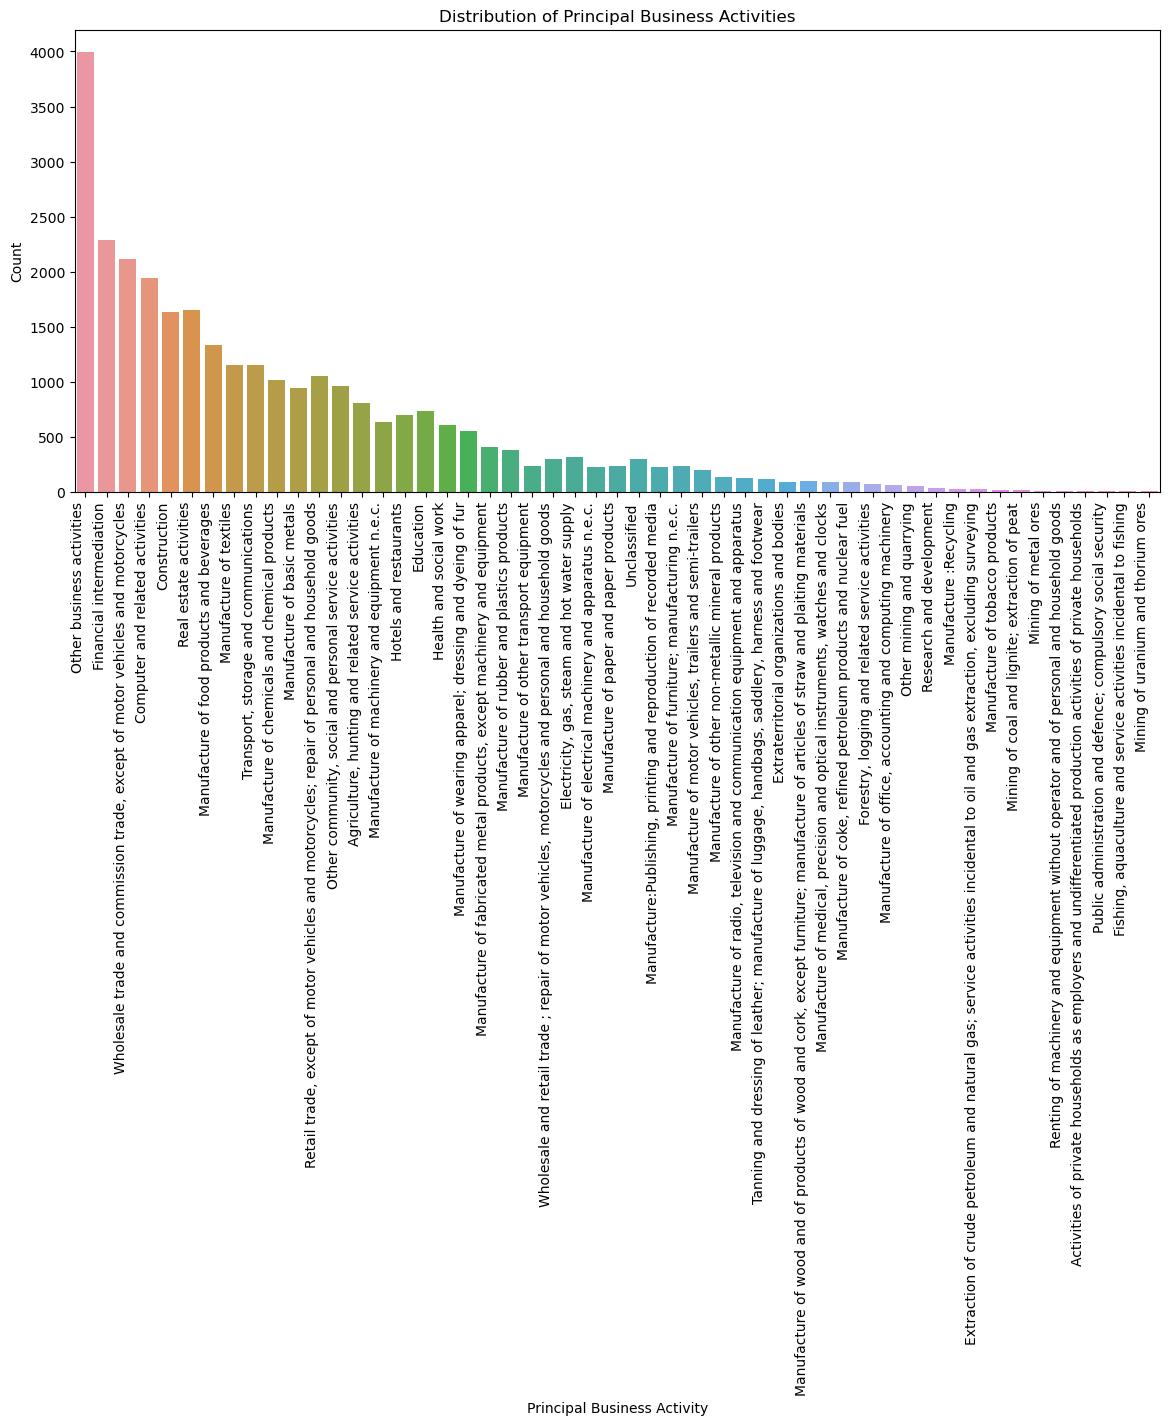

In [23]:
# EDA - Distribution of Principal Business Activities
plt.figure(figsize=(14, 6))
sns.countplot(x='PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)], order=df['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'].value_counts().index)
plt.title('Distribution of Principal Business Activities')
plt.xlabel('Principal Business Activity')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.show()

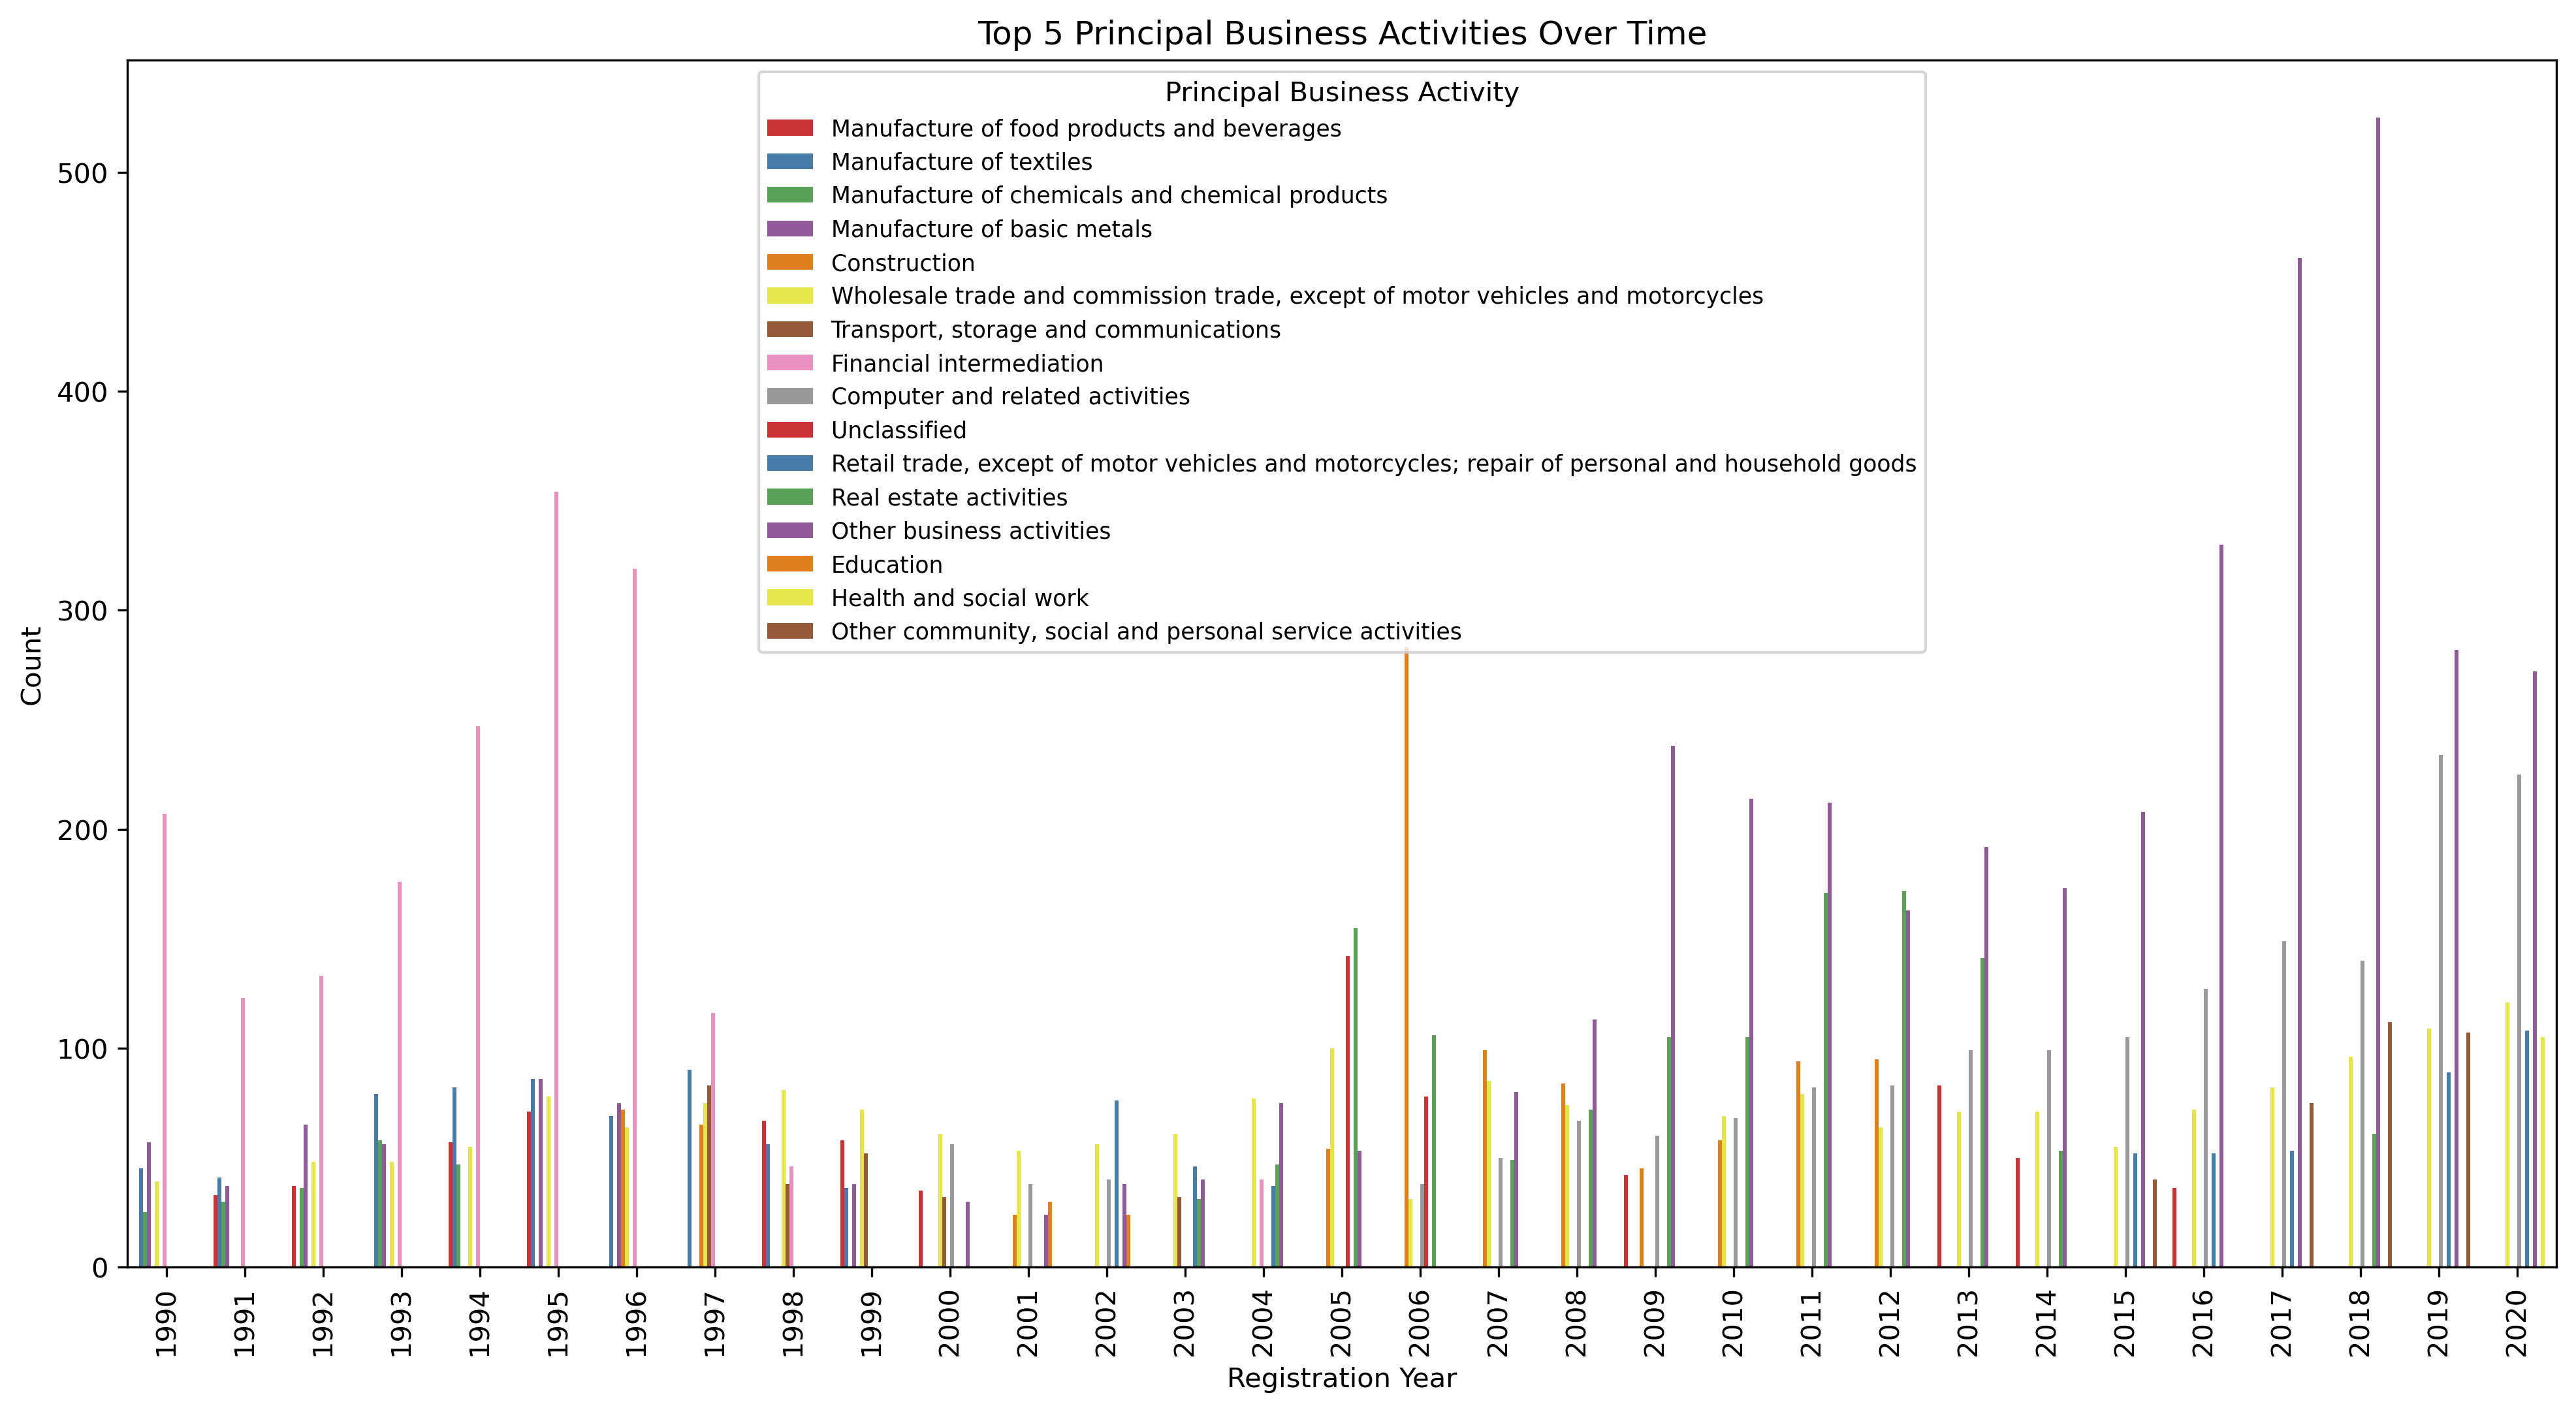

In [24]:
# Find the top 5 business activities for each year
top_activities = df.loc[(df['Registration_Year']>=1990) & (df['Registration_Year'] <= 2020)].groupby('Registration_Year')['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'].apply(lambda x: x.value_counts().nlargest(5).index.tolist())

# Filter the dataframe to include only the top activities
df_top_activities = df[df.apply(lambda x: x['Registration_Year'] in top_activities.index and x['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'] in top_activities.loc[x['Registration_Year']], axis=1)]

plt.figure(figsize=(16, 8),dpi=300)
sns.countplot(x='Registration_Year', hue='PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN', data=df_top_activities, palette='Set1')
plt.title('Top 5 Principal Business Activities Over Time')
plt.xlabel('Registration Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Principal Business Activity', fontsize='small')
plt.show()

In [25]:
# Filter companies registered between 2013 and 2020
filtered_df = df[(df['Registration_Year'] >= 2013) & (df['Registration_Year'] <= 2020)]

# Get the top 5 business activities
top_business_activities = filtered_df['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'].value_counts().head(5)

# Print the result
print("Top 5 PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN from 2013 to 2020:")
print(top_business_activities)

Top 5 PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN from 2013 to 2020:
Other business activities                                                                         2443
Computer and related activities                                                                   1178
Wholesale trade and commission trade, except of motor vehicles and motorcycles                     677
Other community, social and personal service activities                                            558
Retail trade, except of motor vehicles and motorcycles; repair of personal and household goods     489
Name: PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN, dtype: int64


### Authorized capital

In [26]:
# Convert columns to appropriate data types
# Use .loc to ensure you're modifying the original DataFrame
df.loc[:, 'AUTHORIZED_CAP'] = df['AUTHORIZED_CAP'].astype(float)
df.loc[:, 'PAIDUP_CAPITAL'] = df['PAIDUP_CAPITAL'].astype(float)
# Group by 'PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN' and calculate the mean of 'AUTHORIZED_CAP' and 'PAIDUP_CAPITAL'
grouped_df = df.groupby('PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN')[['AUTHORIZED_CAP', 'PAIDUP_CAPITAL']].mean().reset_index()

In [27]:
#Trend analysis of Authorized capital
# Ensure the DataFrame is sorted by the time column
df = df.sort_values(by='Registration_Year')

# Calculate the percentage change in authorized capital for each activity over time
df['CAPITAL_CHANGE'] = df.groupby(['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN', 'Registration_Year'])['AUTHORIZED_CAP'].pct_change().fillna(0)

# Group by 'PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN' and calculate the mean of 'CAPITAL_CHANGE'
activity_trend_df = df.groupby(['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN','Registration_Year'])['CAPITAL_CHANGE'].mean().reset_index()

# Print the new DataFrame with the trend analysis
activity_trend_df2= activity_trend_df.interpolate()
activity_trend_df2


PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN  Registration_Year  \
0     Activities of private households as employers ...               1991   
1     Activities of private households as employers ...               1996   
2     Activities of private households as employers ...               1999   
3     Activities of private households as employers ...               2002   
4     Activities of private households as employers ...               2012   
...                                                 ...                ...   
2087  Wholesale trade and commission trade, except o...               2068   
2088  Wholesale trade and commission trade, except o...               2069   
2089  Wholesale trade and commission trade, except o...               2070   
2090  Wholesale trade and commission trade, except o...               2072   
2091  Wholesale trade and commission trade, except o...               2073   

      CAPITAL_CHANGE  
0           0.000000  
1          -0.312500  
2           0.000000  
3           0.000000  
4           0.000000  
...              ...  
2087        0.000000  
2088       -0.455000  
2089        0.212500  
2090        0.000000  
2091        1.820123  

[2092 rows x 3 columns]

### Comparison Score

In [28]:
# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Activity_1', 'Activity_2', 'Comparison'])

# Comparative Analysis: This compares the mean paid-up capital of all business activities.
# It helps in understanding their relative performance and market standing.
for i in range(len(grouped_df) - 1):
    for j in range(i + 1, len(grouped_df)):
        activity1_capital = grouped_df.loc[i, 'PAIDUP_CAPITAL']
        activity2_capital = grouped_df.loc[j, 'PAIDUP_CAPITAL']
        comparison = activity1_capital / activity2_capital
        new_row = pd.DataFrame({'Activity_1': [grouped_df.loc[i, 'PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN']],
                                'Activity_2': [grouped_df.loc[j, 'PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN']],
                                'Comparison': [comparison]})
        results_df = pd.concat([results_df, new_row], ignore_index=True)

# Print the results DataFrame
results_df

Activity_1  \
0     Activities of private households as employers ...   
1     Activities of private households as employers ...   
2     Activities of private households as employers ...   
3     Activities of private households as employers ...   
4     Activities of private households as employers ...   
...                                                 ...   
1270              Transport, storage and communications   
1271              Transport, storage and communications   
1272                                       Unclassified   
1273                                       Unclassified   
1274  Wholesale and retail trade ; repair of motor v...   

                                             Activity_2  Comparison  
0     Agriculture, hunting and related service activ...    0.265486  
1                       Computer and related activities    1.039830  
2                                          Construction    0.261889  
3                                             Education    1.426354  
4          Electricity, gas, steam and hot water supply    0.001012  
...                                                 ...         ...  
1270  Wholesale and retail trade ; repair of motor v...    1.588926  
1271  Wholesale trade and commission trade, except o...    3.384856  
1272  Wholesale and retail trade ; repair of motor v...    0.891278  
1273  Wholesale trade and commission trade, except o...    1.898671  
1274  Wholesale trade and commission trade, except o...    2.130279  

[1275 rows x 3 columns]

### Liquidity Ratios

In [29]:
# Liquidity Ratios: This calculates the liquidity ratio (authorized capital to paid-up capital) for each company.
# It is crucial for assessing the financial health of a company.
# Make sure 'df' is the original DataFrame or explicitly create a copy if it's a subset
df = df.copy()

# Calculate the liquidity ratio without warnings
df.loc[:, 'LIQUIDITY_RATIO'] = df['AUTHORIZED_CAP'] / df['PAIDUP_CAPITAL']

# Now, let's create a smaller DataFrame to showcase the liquidity ratios
# Selecting relevant columns for the smaller DataFrame
liquidity_df = df[['Company_Name', 'AUTHORIZED_CAP', 'PAIDUP_CAPITAL', 'LIQUIDITY_RATIO']].copy()

# Displaying the smaller DataFrame
print("Smaller DataFrame showcasing Liquidity Ratios:")
liquidity_df

Smaller DataFrame showcasing Liquidity Ratios:


Company_Name  AUTHORIZED_CAP  \
13552         BACHITTER SINGH ANDSONS FINANCE PVT LTD       1000000.0   
16468                        WHITEHAWKS IMPEX PVT LTD        100000.0   
21352                         L P INVESTMENTS LIMITED     105000000.0   
21353           ATWAL FINANCE COMPANY PRIVATE LIMITED       2500000.0   
21354         BACHAN MOTOR FINANCIERS PRIVATE LIMITED        500000.0   
...                                               ...             ...   
32301                         BHOGALS PRIVATE LIMITED       5000000.0   
5917          MAHALAXMI CALICO PRINTING MILLS PVT LTD       1000000.0   
3142             SHRI ATMA VALLBH INVESTMENTS PVT LTD        100000.0   
23277  VITAMIN CHIT FUND AND FINANCERS PRIVATELIMITED         20000.0   
8997                    KAKKAR COMPLEX STEELS PVT LTD      14000000.0   

       PAIDUP_CAPITAL  LIQUIDITY_RATIO  
13552        414000.0         2.415459  
16468          5000.0        20.000000  
21352     103825000.0         1.011317  
21353        700000.0         3.571429  
21354        267000.0         1.872659  
...               ...              ...  
32301       4375000.0         1.142857  
5917           2000.0       500.000000  
3142          11000.0         9.090909  
23277          6000.0         3.333333  
8997         447000.0        31.319911  

[34920 rows x 4 columns]

# Model

C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible start

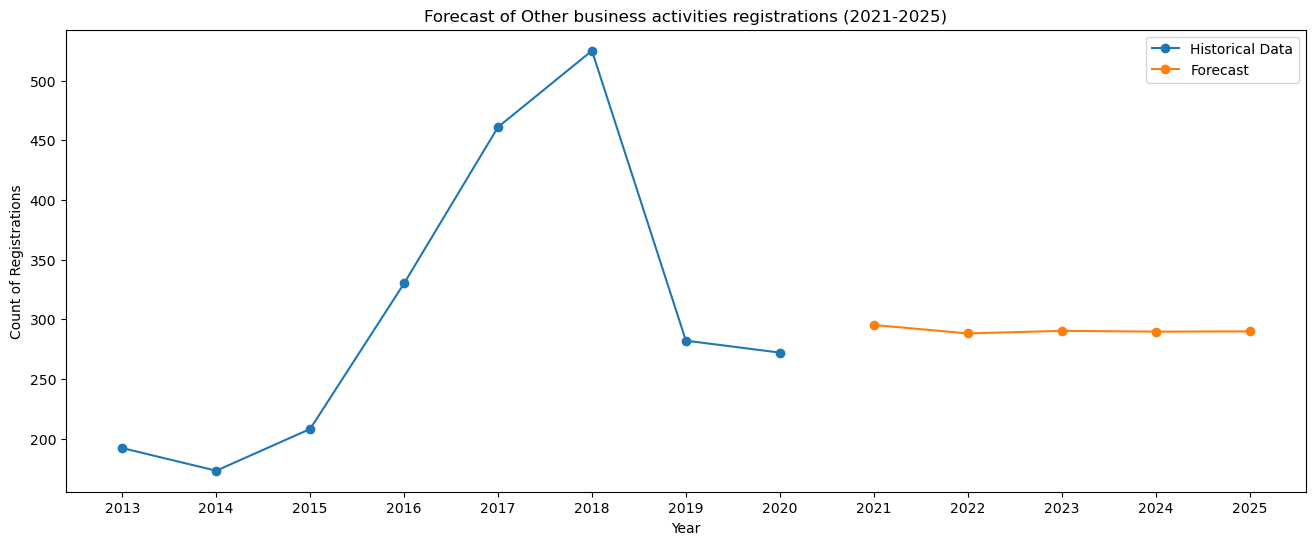

Forecasted registrations for Other business activities for 2021-2025:
2021-01-01    295.136610
2022-01-01    288.066100
2023-01-01    290.226836
2024-01-01    289.566519
2025-01-01    289.768311
Freq: AS-JAN, Name: predicted_mean, dtype: float64


C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible start

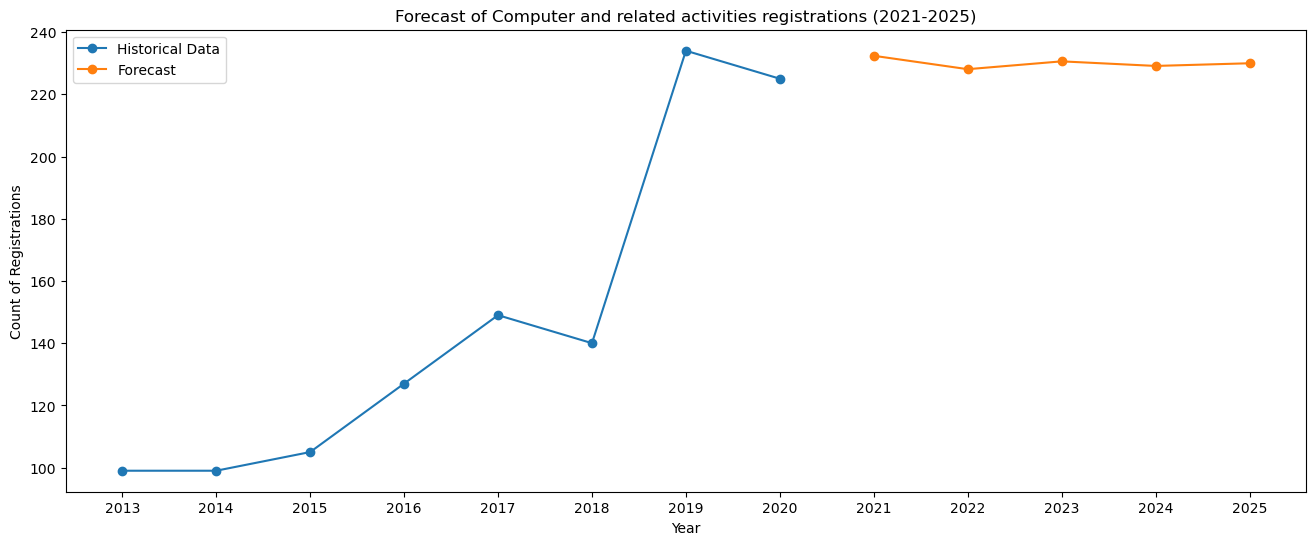

Forecasted registrations for Computer and related activities for 2021-2025:
2021-01-01    232.371296
2022-01-01    228.064620
2023-01-01    230.580793
2024-01-01    229.110720
2025-01-01    229.969610
Freq: AS-JAN, Name: predicted_mean, dtype: float64


C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


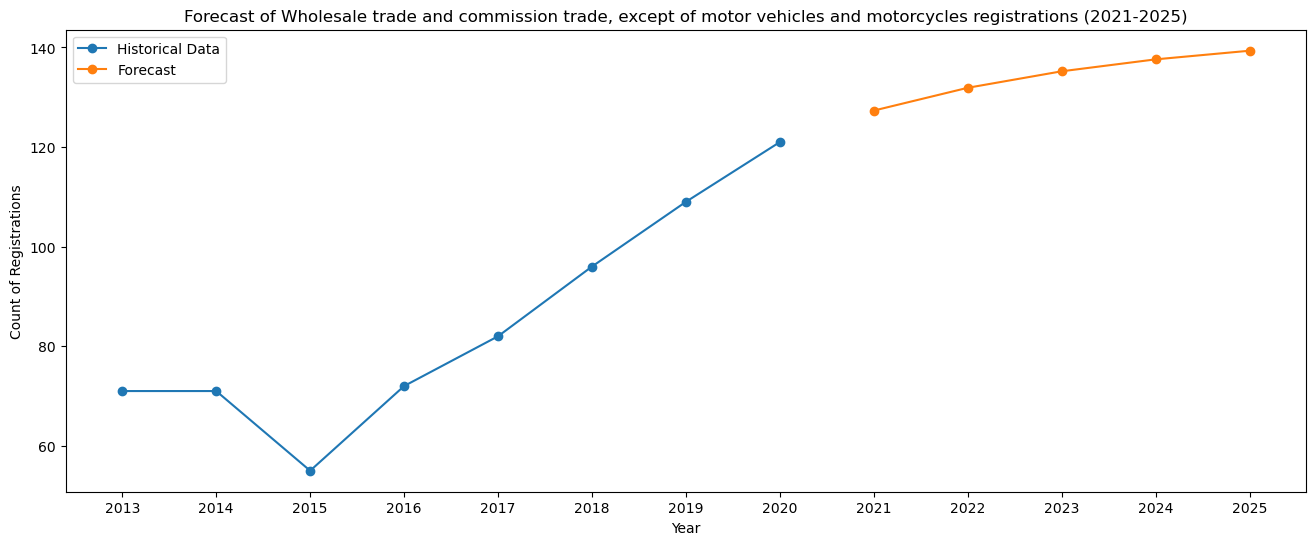

Forecasted registrations for Wholesale trade and commission trade, except of motor vehicles and motorcycles for 2021-2025:
2021-01-01    127.323908
2022-01-01    131.900751
2023-01-01    135.213180
2024-01-01    137.610506
2025-01-01    139.345539
Freq: AS-JAN, Name: predicted_mean, dtype: float64


C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


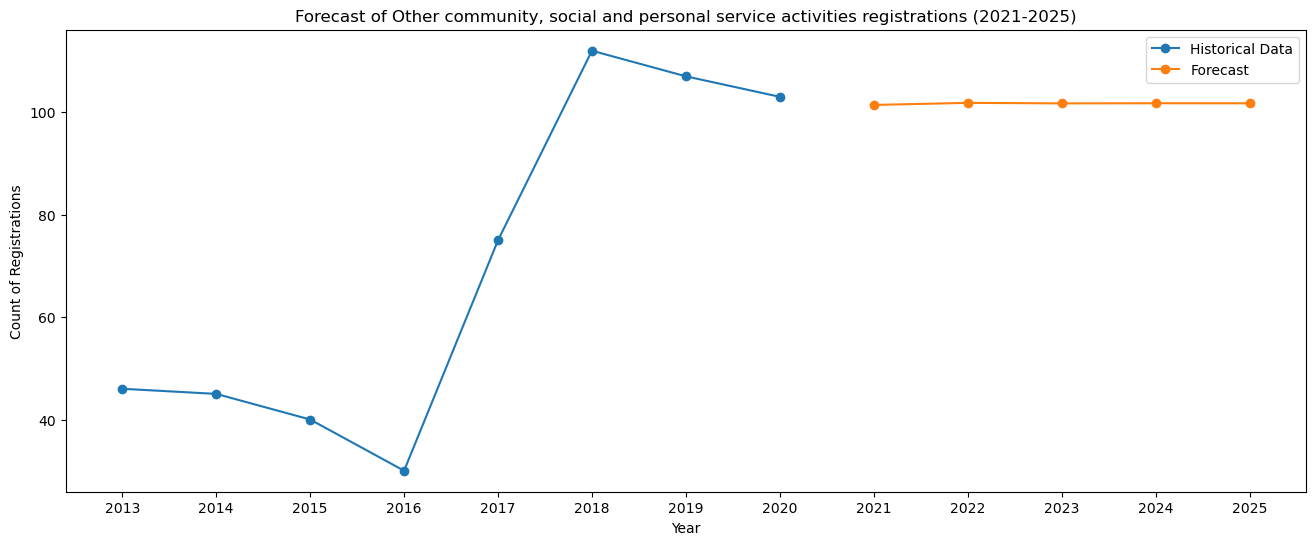

Forecasted registrations for Other community, social and personal service activities for 2021-2025:
2021-01-01    101.416745
2022-01-01    101.822928
2023-01-01    101.718722
2024-01-01    101.745456
2025-01-01    101.738597
Freq: AS-JAN, Name: predicted_mean, dtype: float64


C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


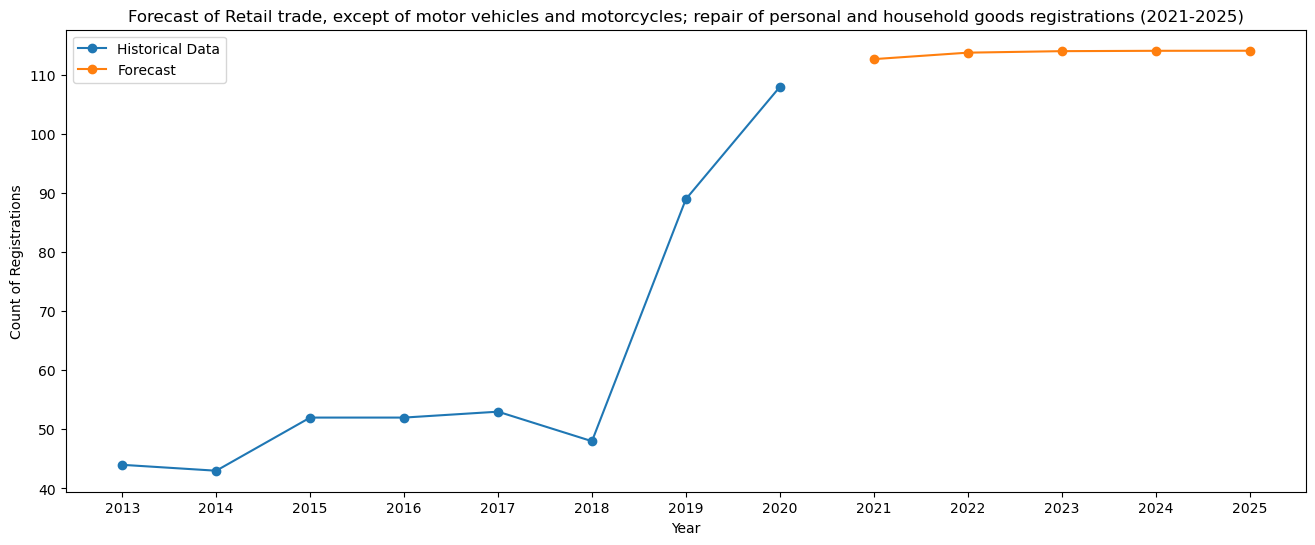

Forecasted registrations for Retail trade, except of motor vehicles and motorcycles; repair of personal and household goods for 2021-2025:
2021-01-01    112.703032
2022-01-01    113.799057
2023-01-01    114.054482
2024-01-01    114.114007
2025-01-01    114.127880
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [30]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'df' is your DataFrame
# Convert 'Latest_Year_AR' to datetime format
df['Latest_Year_AR'] = pd.to_datetime(df['Latest_Year_AR'], errors='coerce')

# Define the top 5 categories for forecasting
top_categories = [
    'Other business activities',
    'Computer and related activities',
    'Wholesale trade and commission trade, except of motor vehicles and motorcycles',
    'Other community, social and personal service activities',
    'Retail trade, except of motor vehicles and motorcycles; repair of personal and household goods'
]

# Loop through each category for forecasting
for category_to_forecast in top_categories:
    # Filter data for the specific category and the specified time range
    category_df = df[(df['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'] == category_to_forecast) & 
                     (df['Registration_Year'] >= 2013) & (df['Registration_Year'] <= 2020)]

    # Extract relevant features and target variable
    X = category_df[['Registration_Year']]
    y = category_df.groupby('Registration_Year').size()

    # Convert 'Registration_Year' to DateTime format
    y.index = pd.to_datetime(y.index, format='%Y')

    # Fit ARIMA model
    model = ARIMA(y, order=(1, 1, 1))  # Adjust order as needed
    fit_model = model.fit()

    # Forecast registrations for the next 5 years (2021-2025)
    forecast_steps = 5
    forecast_values = fit_model.forecast(steps=forecast_steps)

    # Plot the forecast
    plt.figure(figsize=(16, 6))
    plt.plot(y.index.year, y.values, marker='o', label='Historical Data')
    plt.plot(range(y.index.year.max() + 1, y.index.year.max() + 1 + forecast_steps), forecast_values, marker='o', label='Forecast')
    plt.title(f'Forecast of {category_to_forecast} registrations (2021-2025)')
    plt.xticks(np.arange(2013, 2026, 1))
    plt.xlabel('Year')
    plt.ylabel('Count of Registrations')
    plt.legend()
    plt.show()

    # Display the forecasted values
    print(f"Forecasted registrations for {category_to_forecast} for 2021-2025:")
    print(forecast_values)